# Julia packages

In [ ]:
import Pkg
Pkg.add("Gen")
Pkg.add("Plots")
Pkg.add("StatsBase")
Pkg.add("Distributions")
Pkg.add("Luxor")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Calculus ──────────────── v0.5.1
   Installed Rmath ─────────────────── v0.7.1
   Installed DualNumbers ───────────── v0.6.8
   Installed IrrationalConstants ───── v0.2.2
   Installed DiffRules ─────────────── v1.15.1
   Installed DiffResults ───────────── v1.1.0
   Installed StatsFuns ─────────────── v1.3.1
   Installed HypergeometricFunctions ─ v0.3.23
   Installed FunctionalCollections ─── v0.5.0
   Installed PDMats ────────────────── v0.11.31
   Installed DataAPI ───────────────── v1.16.0
   Installed StaticArraysCore ──────── v1.4.2
   Installed NaNMath ───────────────── v1.0.2
   Installed SpecialFunctions ──────── v2.3.1
   Installed ReverseDiff ───────────── v1.15.1
   Installed StaticArrays ──────────── v1.9.3
   Installed Rmath_jll ─────────────── v0.4.0+0
   Installed FunctionWrappers ──────── v1.1.3
   Installed Reexport ──────────────── v1.2.2
   Installed OrderedColle

In [ ]:
import Random, Logging
using Gen, Plots, Distributions
using StatsBase: mean

[ Info: Precompiling Gen [ea4f424c-a589-11e8-07c0-fd5c91b9da4a]


# Part 3 - Data-Driven Proposals

### Exercise 1

Using `simulate` (or `generate`, without any constraints) to sample a trace, print the random choices made by this model. Parameterize the planner using `PlannerParams` with the same parameters as above.

In [ ]:
observations = Gen.choicemap()

observations[:start_x] = 0.5
observations[:start_y] = 0.7
(trace, _) = generate(agent_model, (scene, dt, num_ticks, planner_params), observations)

(Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Scene, Float64, Int64, PlannerParams], false, Union{Nothing, Some{Any}}[nothing, nothing, nothing, nothing], var"##agent_model#291", Bool[0, 0, 0, 0], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}(:start_x => Gen.ChoiceOrCallRecord{Float64}(0.5, -0.0, NaN, true), :dest_y => Gen.ChoiceOrCallRecord{Float64}(0.11681374169583003, -0.0, NaN, true), :start_y => Gen.ChoiceOrCallRecord{Float64}(0.7, -0.0, NaN, true), :dest_x => Gen.ChoiceOrCallRecord{Float64}(0.017914004367672653, -0.0, NaN, true), :speed => Gen.ChoiceOrCallRecord{Float64}(0.6130964164835722, 0.35667494393873245, NaN, true)), Dict{Any, Trie{Any, Gen.ChoiceOrCallRecord}}(:meas => Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}((3, :x) => Gen.ChoiceOrCallRecord{Float64}(0.48479732768432665, 2.5306254250947138, NaN, true), (4, :y) => Gen.ChoiceOrCallRecord{Float64}(

In [ ]:
Gen.get_choices(trace)

│
├── :start_x : 0.5
│
├── :dest_y : 0.11681374169583003
│
├── :start_y : 0.7
│
├── :dest_x : 0.017914004367672653
│
├── :speed : 0.6130964164835722
│
└── :meas
    │
    ├── (3, :x) : 0.48479732768432665
    │
    ├── (4, :y) : 0.707613859356239
    │
    ├── (7, :x) : 0.5035937933633642
    │
    ├── (2, :y) : 0.7133322596565688
    │
    ├── (10, :y) : 0.6919384637352267
    │
    ├── (5, :y) : 0.693356315863024
    │
    ├── (4, :x) : 0.5094236197120147
    │
    ├── (2, :x) : 0.49196486923059135
    │
    ├── (10, :x) : 0.4962136673213711
    │
    ├── (8, :y) : 0.6997226955653623
    │
    ├── (1, :y) : 0.695800659111975
    │
    ├── (5, :x) : 0.4919039118735435
    │
    ├── (6, :y) : 0.7217599260549747
    │
    ├── (9, :y) : 0.6912053732566322
    │
    ├── (8, :x) : 0.5038115407952531
    │
    ├── (3, :y) : 0.7227154153014305
    │
    ├── (1, :x) : 0.5071292238916866
    │
    ├── (6, :x) : 0.5103909153142543
    │
    ├── (7, :y) : 0.6995718810072468
    │
    └── (9, :x)

In [ ]:
s = Point(trace[:start_x], trace[:start_y])
d = Point(trace[:dest_x], trace[:dest_y])

p = append!([s], [Point(trace[:meas => (i, :x)], trace[:meas => (i, :y)]) for i in 1:10], [d])
p

12-element Vector{Point}:
 Point(0.5, 0.7)
 Point(0.5071292238916866, 0.695800659111975)
 Point(0.49196486923059135, 0.7133322596565688)
 Point(0.48479732768432665, 0.7227154153014305)
 Point(0.5094236197120147, 0.707613859356239)
 Point(0.4919039118735435, 0.693356315863024)
 Point(0.5103909153142543, 0.7217599260549747)
 Point(0.5035937933633642, 0.6995718810072468)
 Point(0.5038115407952531, 0.6997226955653623)
 Point(0.5050055752520386, 0.6912053732566322)
 Point(0.4962136673213711, 0.6919384637352267)
 Point(0.017914004367672653, 0.11681374169583003)

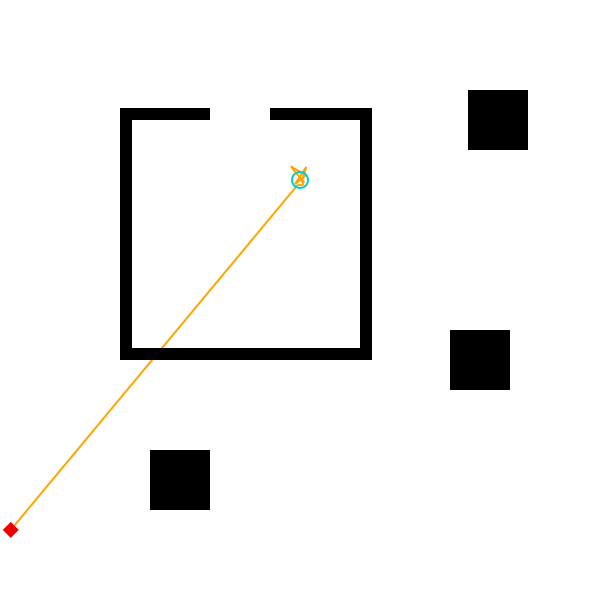

In [ ]:
visualize() do
    draw_trace(Dict(:start => s, :dest => d, :scene => scene, :path => p); should_draw_measurements=false)
end

### Exercise 2
Edit the constraints passed to the inference algorithm:

Constrain the start of the agent to be at `x = 0.9`, `y = 0.1`.

Constrain the destination of the agent to be at `x = 0.9`, `y = 0.8`.

Visualize the resulting prior. We have provided some starter code.

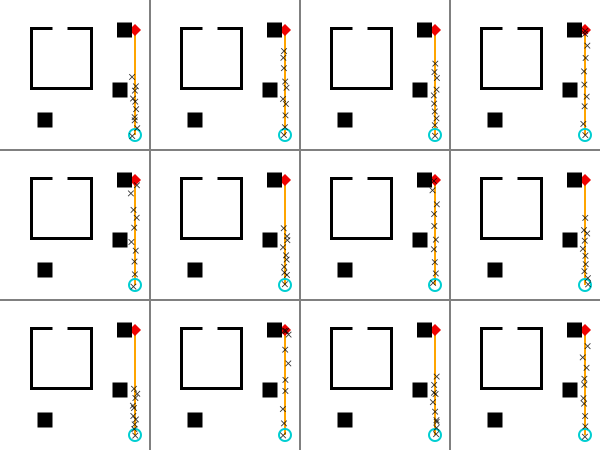

In [ ]:
# Let's visualize several traces of the function, with the start location fixed to
# a point in the lower-left corner:
observations = Gen.choicemap()
observations[:start_x] = 0.9
observations[:start_y] = 0.1
observations[:dest_x] = 0.9
observations[:dest_y] = 0.8

traces = [Gen.generate(agent_model, (scene, dt, num_ticks, planner_params), observations)[1] for i in 1:12];
visualize_grid(traces, 4, 600; separators="gray") do trace, frame
    draw_trace(trace, frame; draw_measurements=true, markersize=6)
end

### Exercise 3

The `rrt_iters` field of `PlannerParams` is the number of iterations of the RRT algorithm to use. The `refine_iters` field of `PlannerParams` is the number of iterations of path refinement. These parameters affect the distribution on paths of the agent. Visualize traces of the `agent_model` with a couple of different settings of these two parameters to the path planning algorithm for fixed starting point and destination point. Try setting them to smaller values. Discuss.

In [ ]:
constraints = Gen.choicemap()
constraints[:start_x] = 0.1
constraints[:start_y] = 0.1
constraints[:dest_x] = 0.25
constraints[:dest_y] = 0.45

0.45

Modify the `PlannerParams` in the cell below.

In [ ]:
function plotIt(refine_iters, rrt_iters)
    planner_params = PlannerParams(rrt_iters=300, rrt_dt=3.0, refine_iters=2000, refine_std=1.) # < change this line>

    traces = [Gen.generate(agent_model, (scene, dt, num_ticks, planner_params), constraints)[1] for i in 1:12];
    visualize_grid(traces, 4, 600; separators="gray") do trace, frame
        draw_trace(trace, frame; draw_measurements=true)
    end
end

plotIt (generic function with 1 method)

"the plot for refine_iter = 5 and rrt_iter = 5. Time elapsed: 0.199780672"

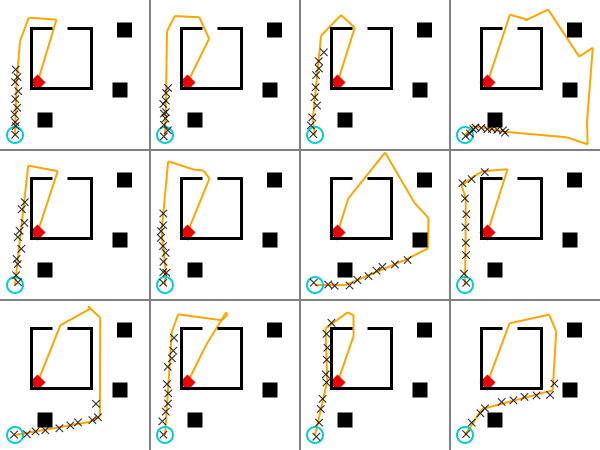

"the plot for refine_iter = 5 and rrt_iter = 20. Time elapsed: 0.054212903"

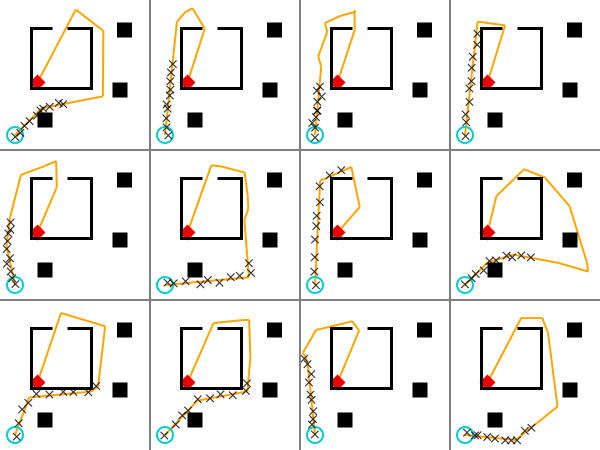

"the plot for refine_iter = 5 and rrt_iter = 40. Time elapsed: 0.05184668"

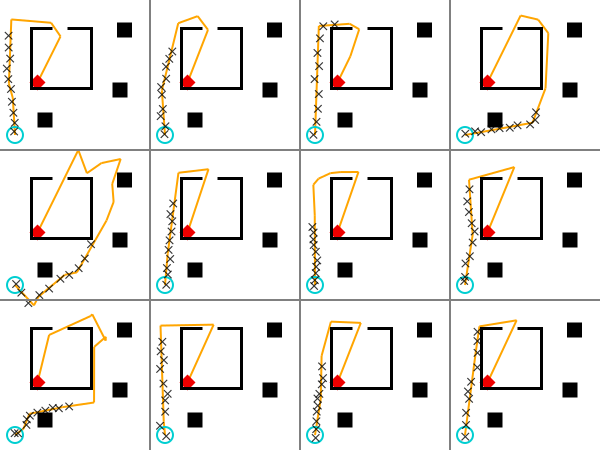

"the plot for refine_iter = 5 and rrt_iter = 100. Time elapsed: 0.051399163"

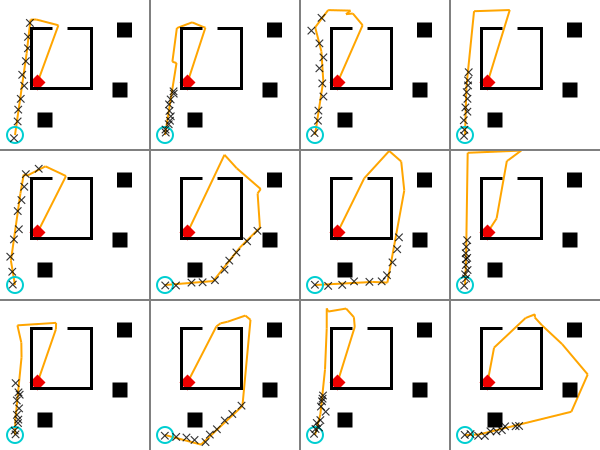

"the plot for refine_iter = 5 and rrt_iter = 1000. Time elapsed: 0.053851899"

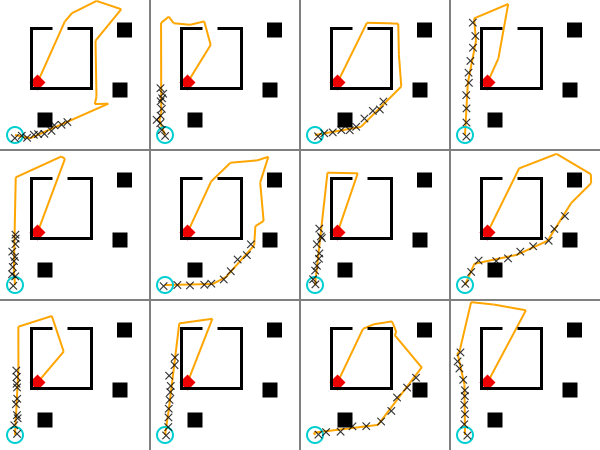

"the plot for refine_iter = 20 and rrt_iter = 5. Time elapsed: 0.053264953"

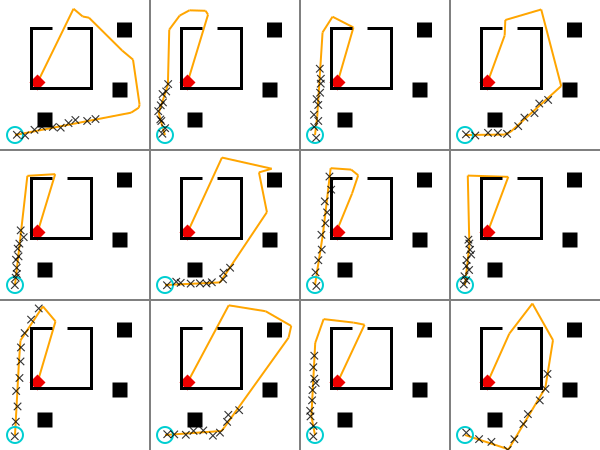

"the plot for refine_iter = 20 and rrt_iter = 20. Time elapsed: 0.052921716"

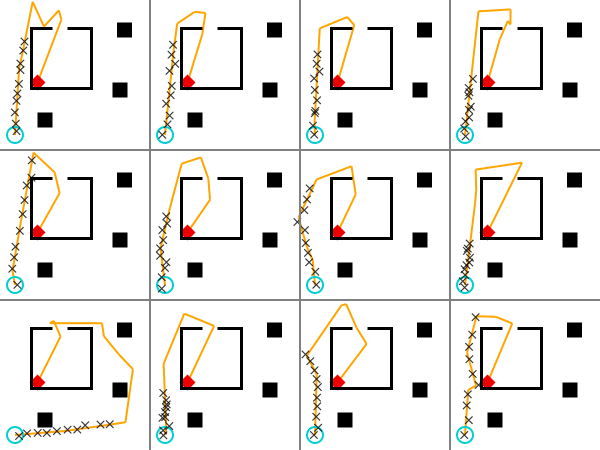

"the plot for refine_iter = 20 and rrt_iter = 40. Time elapsed: 0.057648425"

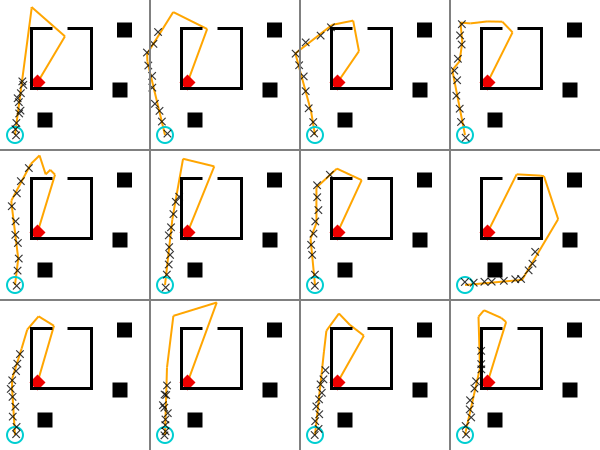

"the plot for refine_iter = 20 and rrt_iter = 100. Time elapsed: 0.053349986"

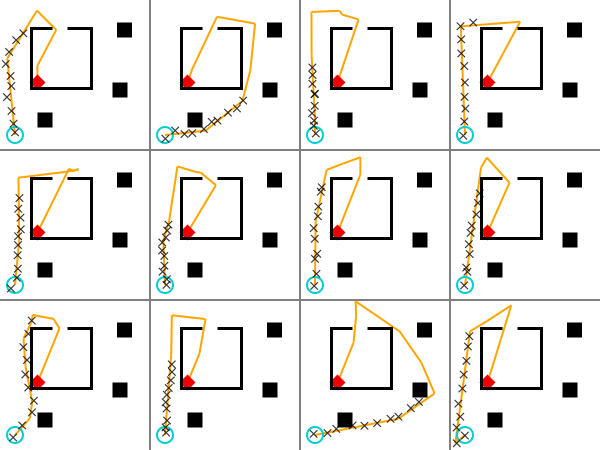

"the plot for refine_iter = 20 and rrt_iter = 1000. Time elapsed: 0.066631301"

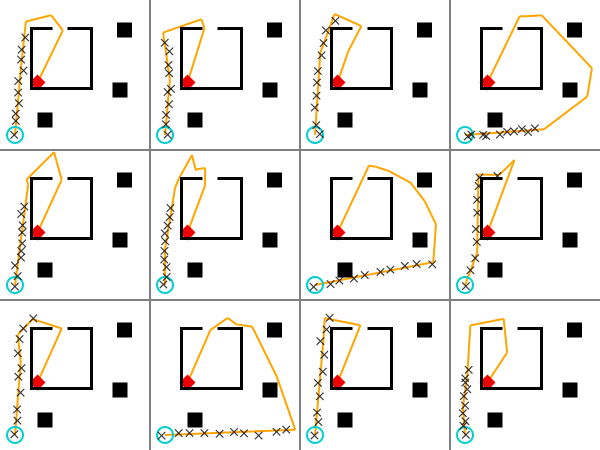

"the plot for refine_iter = 100 and rrt_iter = 5. Time elapsed: 0.058543905"

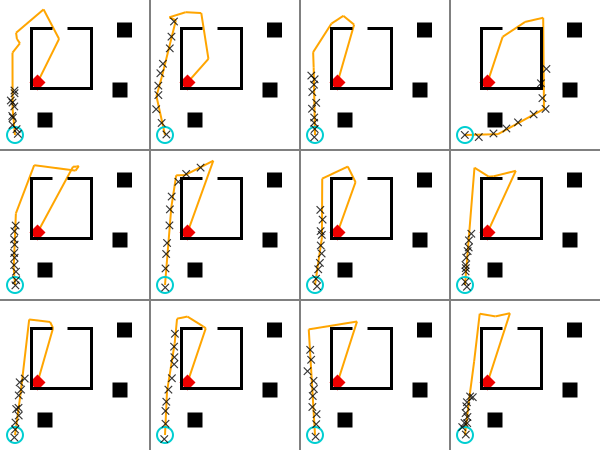

"the plot for refine_iter = 100 and rrt_iter = 20. Time elapsed: 0.052862575"

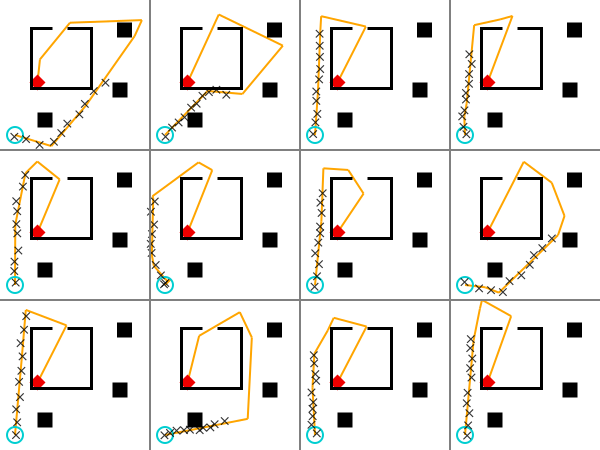

"the plot for refine_iter = 100 and rrt_iter = 40. Time elapsed: 0.057379432"

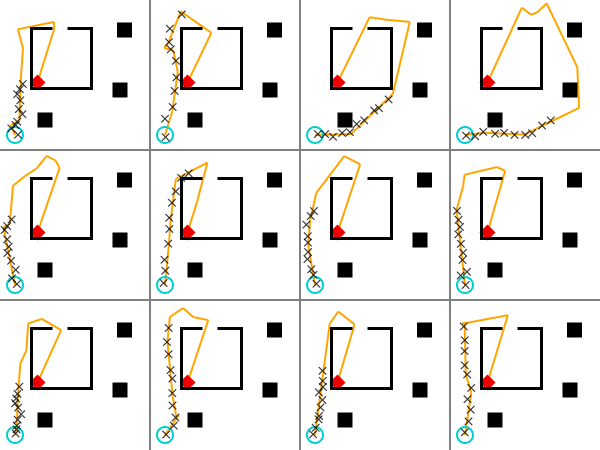

"the plot for refine_iter = 100 and rrt_iter = 100. Time elapsed: 0.057379655"

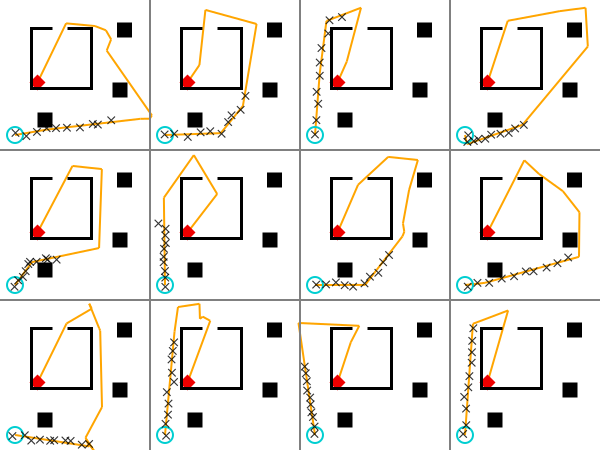

"the plot for refine_iter = 100 and rrt_iter = 1000. Time elapsed: 0.056501355"

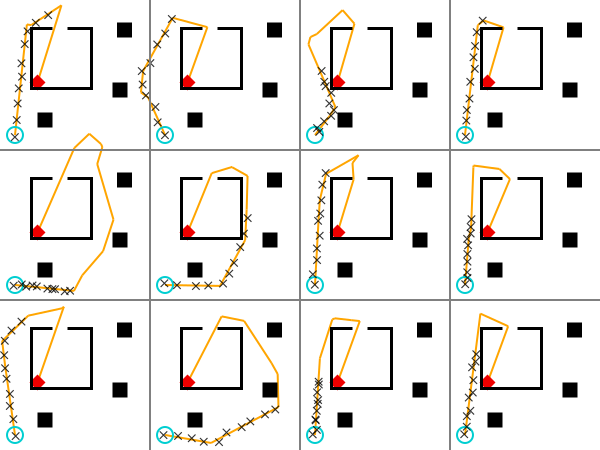

"the plot for refine_iter = 300 and rrt_iter = 5. Time elapsed: 0.056532035"

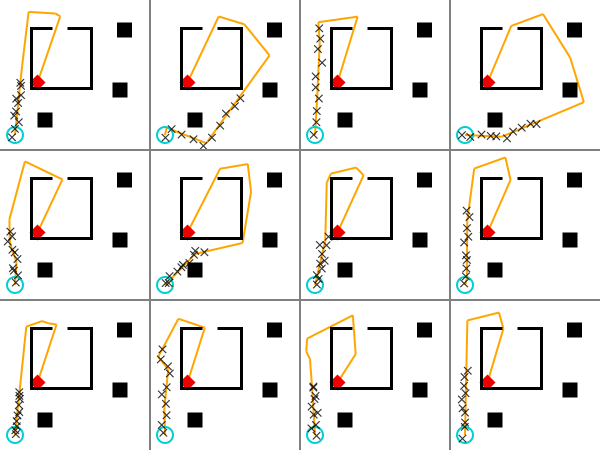

"the plot for refine_iter = 300 and rrt_iter = 20. Time elapsed: 0.057928613"

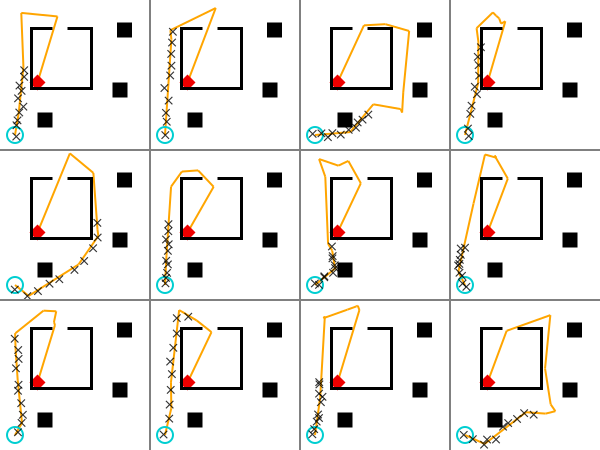

"the plot for refine_iter = 300 and rrt_iter = 40. Time elapsed: 0.060944737"

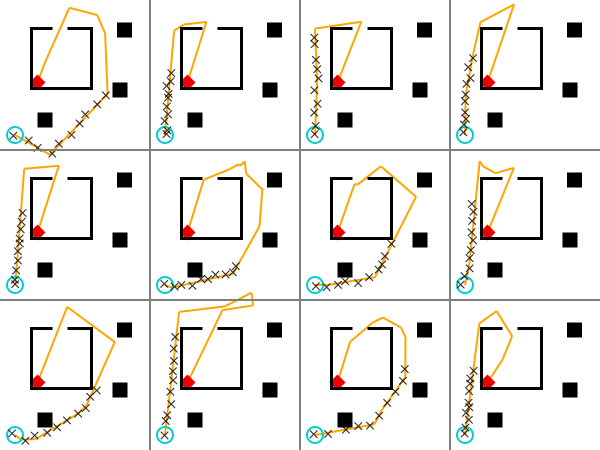

"the plot for refine_iter = 300 and rrt_iter = 100. Time elapsed: 0.074975499"

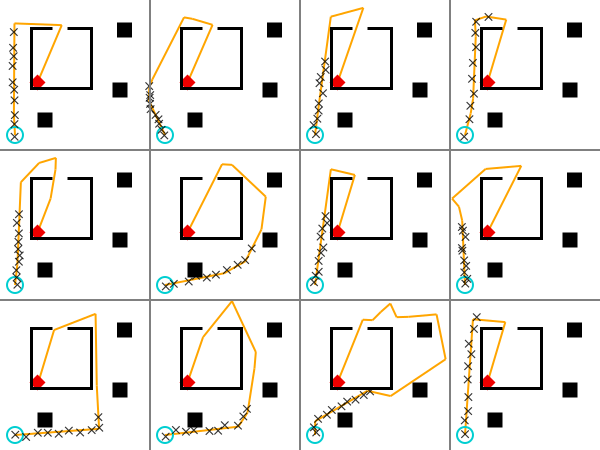

"the plot for refine_iter = 300 and rrt_iter = 1000. Time elapsed: 0.060782021"

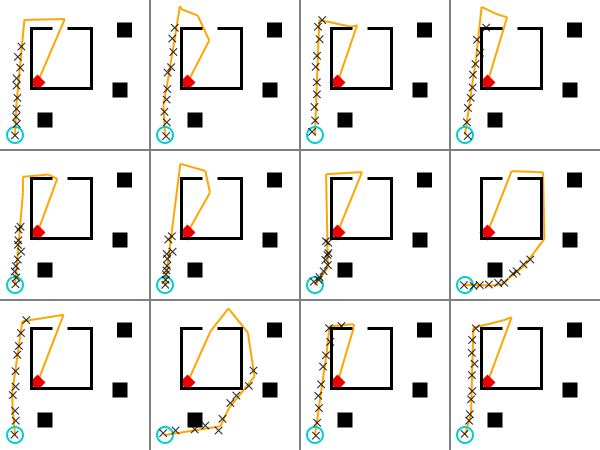

"the plot for refine_iter = 1000 and rrt_iter = 5. Time elapsed: 0.066849447"

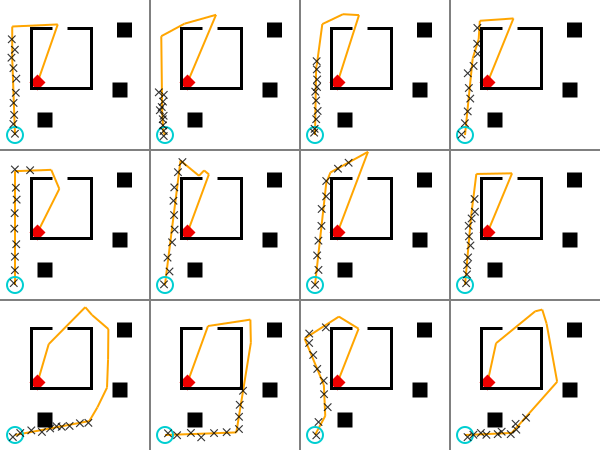

"the plot for refine_iter = 1000 and rrt_iter = 20. Time elapsed: 0.058229842"

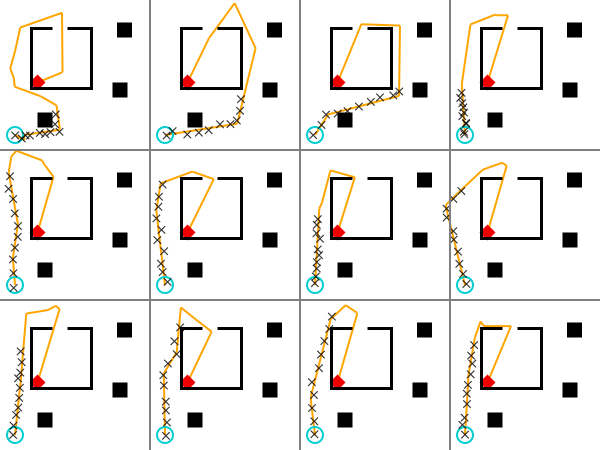

"the plot for refine_iter = 1000 and rrt_iter = 40. Time elapsed: 0.058219319"

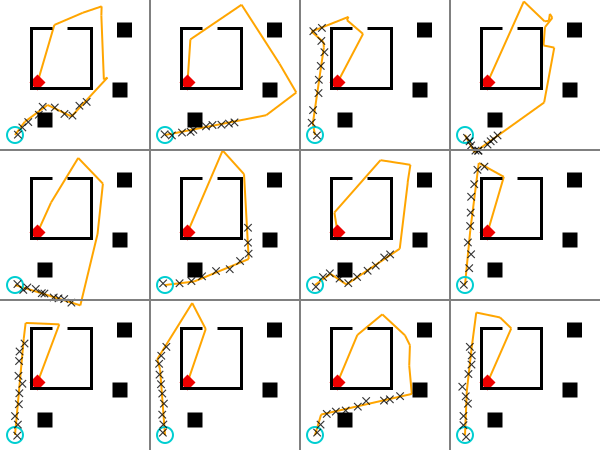

"the plot for refine_iter = 1000 and rrt_iter = 100. Time elapsed: 0.058932169"

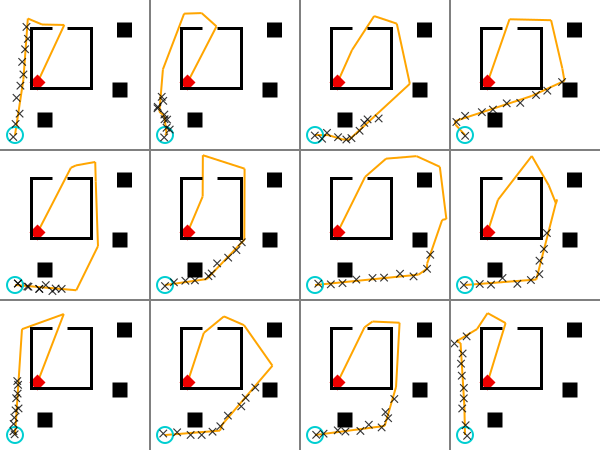

"the plot for refine_iter = 1000 and rrt_iter = 1000. Time elapsed: 0.058050257"

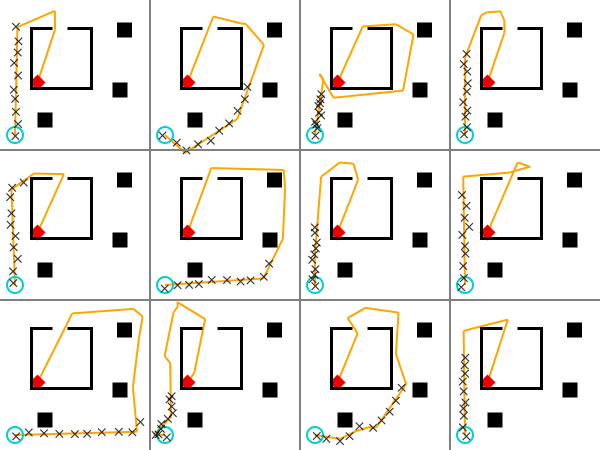

In [ ]:
for refine_iter in [5, 20, 100, 300, 1000]
  for rrt_iter in [5, 20, 40, 100, 1000]
    elapsed_time = @elapsed begin
      plotIt(refine_iter, rrt_iter)
    end
    display("the plot for refine_iter = $refine_iter and rrt_iter = $rrt_iter. Time elapsed: $elapsed_time")
    display(plotIt(refine_iter, rrt_iter))
  end
end

### Exercise 4

Run inference using Gen’s built-in importance resampling implementation. Use 50 importance samples (`amt_computation`).

To see how to use the built-in importance resampling function, run `?Gen.importance_resampling` or check out the documentation.

We have provided some starter code.

In [ ]:
?Gen.importance_resampling

```
(trace, lml_est) = importance_resampling(model::GenerativeFunction,
    model_args::Tuple, observations::ChoiceMap, num_samples::Int;
    verbose=false)

(traces, lml_est) = importance_resampling(model::GenerativeFunction,
    model_args::Tuple, observations::ChoiceMap,
    proposal::GenerativeFunction, proposal_args::Tuple,
    num_samples::Int; verbose=false)
```

Run sampling importance resampling, returning a single trace.

Unlike `importance_sampling`, the memory used constant in the number of samples.

Setting `verbose=true` prints a progress message every sample.


In [ ]:
function do_inference(
        scene::Scene, dt::Float64, num_ticks::Int,
        planner_params::PlannerParams,
        start::Point, measurements::Vector{Point}, amount_of_computation::Int)

    # Constrain the observed measurements.
    observations = Gen.choicemap()
    observations[:start_x] = start.x
    observations[:start_y] = start.y
    for (i, m) in enumerate(measurements)
        observations[:meas => (i, :x)] = m.x
        observations[:meas => (i, :y)] = m.y
    end

    (trace,_) = importance_resampling(agent_model, (scene, dt, num_ticks, planner_params), observations, amount_of_computation)

    return trace
end;

Now visualize your answer

Below, we run this algorithm 1000 times, to generate 1000 approximate samples from the posterior distribution on the destination. The inferred destinations should appear as red dots on the map. First, we abstract this into a function.

In [ ]:
function visualize_inference(measurements, scene, start; computation_amt=50, samples=1000)
    visualize() do
        for i in 1:samples
            trace = do_inference(scene, dt, num_ticks, planner_params, start, measurements, computation_amt)
            draw_trace(trace; draw_measurements=true, draw_path=false)
        end
    end
end;

And now we run it! Note that this might take a while.

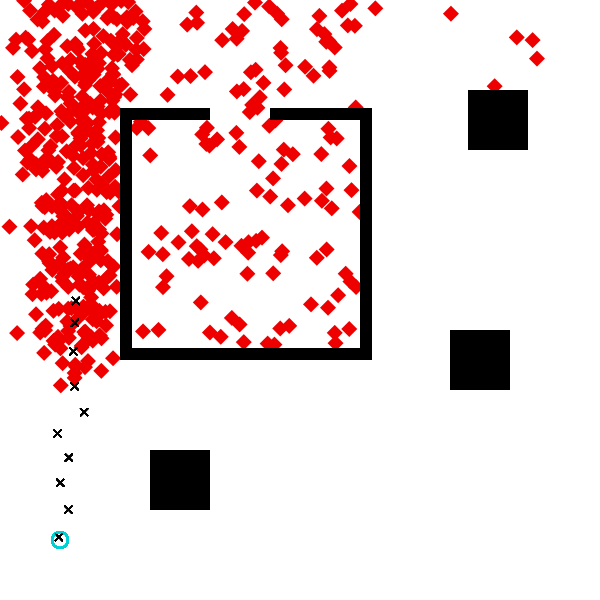

In [ ]:
visualize_inference(measurements, scene, start, computation_amt=50, samples=500)

The algorithm has made reasonable inferences about where the agent was likely trying to go.

The above illustration takes a while to produce. This is because each dot requires sampling 50 times from the default proposal (which runs the RRT planner). When our models contain more expensive components, like the path-planner, the computational demands of inference increase accordingly. This motivates us to find more efficient inference algorithms, that will require fewer model evaluations to produce good results.

### Exercise 5
In this problem, you’ll explore the effect of changing the scene on the inferences we make about the agent. Below, we’ve reproduced the code for constructing the scene in which we performed inference above. Modify the scene so that there is an opening into the “room” along the bottom wall, in addition to the already-existing door along top wall. Otherwise, the scene should be identical to the one above.

Rerun inference. The results should be qualitatively different from the results generated above, even though the observed movements of the agent are identical. **Write a one- or two-sentence description of how the results are different, and why.** Please address:

1. Why would a human make different inferences about the agent’s likely destination in the two different scenes?
2. To what extent does the model succeed in producing qualitiatively different results in the two scenes? Why? (Concretely, why are certain proposals more often rejected by importance sampling in the two-door scene than in the one-door scene?)

Unlike our previous scene, in this scenario with two doors, a human observer would likely consider both openings as potential destinations. This would result in The observer perceiving more options for movement for the agent, leading to different inferences about its likely destination.

The model succeeds in producing qualitatively different results in the two scenes because of the passage options available. Specifically, In this new scene the room no longer traps the model and we have 2 different doors. Certain proposals are more likely to be rejected by importance sampling because the existance of 2 doors increases the complexity of the state space, making it harder for proposals to accurately capture the true distribution of possible agent movements.

In [ ]:
scene_2doors = Scene(xmin=0, xmax=1, ymin=0, ymax=1)

add_obstacle!(scene_2doors, make_square(Point(0.30, 0.20), 0.1))
add_obstacle!(scene_2doors, make_square(Point(0.83, 0.80), 0.1))
add_obstacle!(scene_2doors, make_square(Point(0.80, 0.40), 0.1))

horizontal = false
vertical = true
wall_thickness = 0.02
add_obstacle!(scene_2doors, make_line(horizontal, Point(0.20, 0.40), 0.15, wall_thickness))
add_obstacle!(scene_2doors, make_line(horizontal, Point(0.60 - 0.15, 0.40), 0.15 + wall_thickness, wall_thickness))
add_obstacle!(scene_2doors, make_line(vertical, Point(0.60, 0.40), 0.40, wall_thickness))
add_obstacle!(scene_2doors, make_line(horizontal, Point(0.60 - 0.15, 0.80), 0.15 + wall_thickness, wall_thickness))
add_obstacle!(scene_2doors, make_line(horizontal, Point(0.20, 0.80), 0.15, wall_thickness))
add_obstacle!(scene_2doors, make_line(vertical, Point(0.20, 0.40), 0.40, wall_thickness));

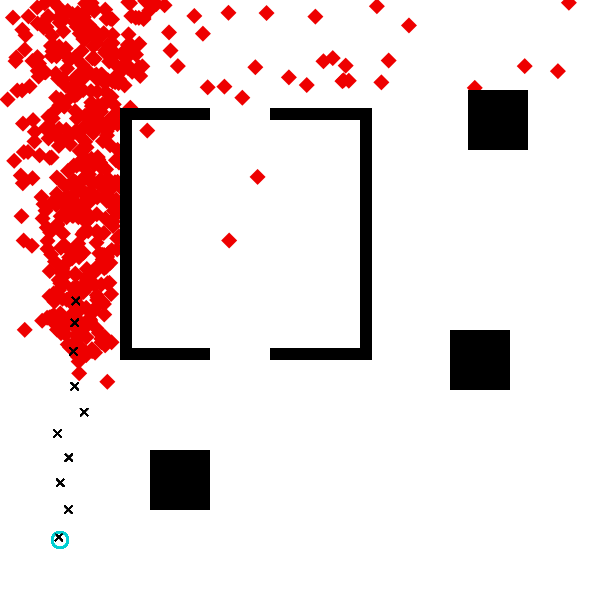

In [ ]:
measurements = [
    Point(0.0980245, 0.104775),
    Point(0.113734, 0.150773),
    Point(0.100412, 0.195499),
    Point(0.114794, 0.237386),
    Point(0.0957668, 0.277711),
    Point(0.140181, 0.31304),
    Point(0.124384, 0.356242),
    Point(0.122272, 0.414463),
    Point(0.124597, 0.462056),
    Point(0.126227, 0.498338)];

# Perform and visualize inference:
visualize_inference(measurements, scene_2doors, start, computation_amt=100, samples=500)

### Exercise 6
Implement an inference program that uses this second variant of importance resampling.

Because we will experiment with different data-driven proposals, we make the proposal into an agument of our inference program. We assume that the proposal accepts arguments `(measurements, scene)`.

This time, use only 5 importance samples (`amt_computation`). You can run `?Gen.importance_resampling` or check out the documentation to understand how to supply the arguments to invoke this second version of of importance resampling.

We have provided some starter code.

In [ ]:
?Gen.importance_resampling

```
(trace, lml_est) = importance_resampling(model::GenerativeFunction,
    model_args::Tuple, observations::ChoiceMap, num_samples::Int;
    verbose=false)

(traces, lml_est) = importance_resampling(model::GenerativeFunction,
    model_args::Tuple, observations::ChoiceMap,
    proposal::GenerativeFunction, proposal_args::Tuple,
    num_samples::Int; verbose=false)
```

Run sampling importance resampling, returning a single trace.

Unlike `importance_sampling`, the memory used constant in the number of samples.

Setting `verbose=true` prints a progress message every sample.


In [ ]:
function do_inference_data_driven(
        dest_proposal::GenerativeFunction,
        scene::Scene, dt::Float64,
        num_ticks::Int, planner_params::PlannerParams,
        start::Point, measurements::Vector{Point},
        amount_of_computation::Int)

    observations = Gen.choicemap((:start_x, start.x), (:start_y, start.y))
    for (i, m) in enumerate(measurements)
        observations[:meas => (i, :x)] = m.x
        observations[:meas => (i, :y)] = m.y
    end

    (trace,_) = importance_resampling(agent_model, (scene, dt, num_ticks, planner_params),
                                      observations, dest_proposal, (measurements, scene), amount_of_computation)

    return trace
end;

function visualize_data_driven_inference(measurements, scene, start, proposal; amt_computation=50, samples=1000)
    visualize() do
      for i=1:samples
          trace = do_inference_data_driven(proposal,
              scene, dt, num_ticks, planner_params, start, measurements, amt_computation)
          draw_trace(trace; draw_path=false)
      end
    end
end;

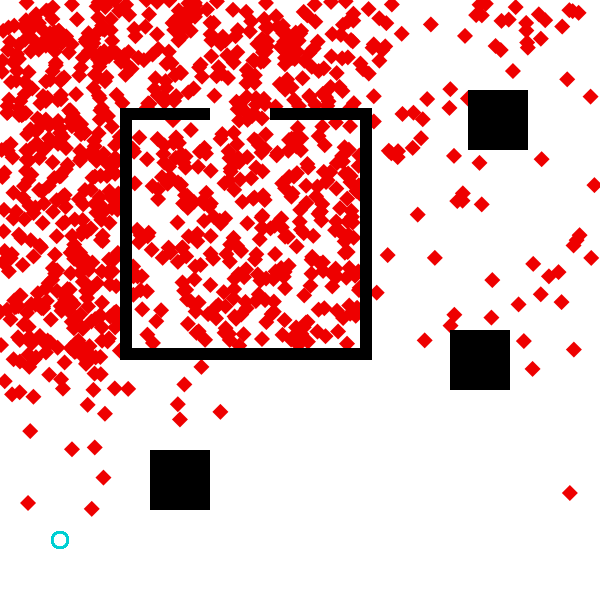

In [ ]:
visualize_data_driven_inference(measurements, scene, start, custom_dest_proposal; amt_computation=5, samples=1000)

The code executes much more quickly than before, because we are only taking five proposal samples to generate each.

We compare this to the original algorithm that used the default proposal, for the same “amount of computation” of 5.

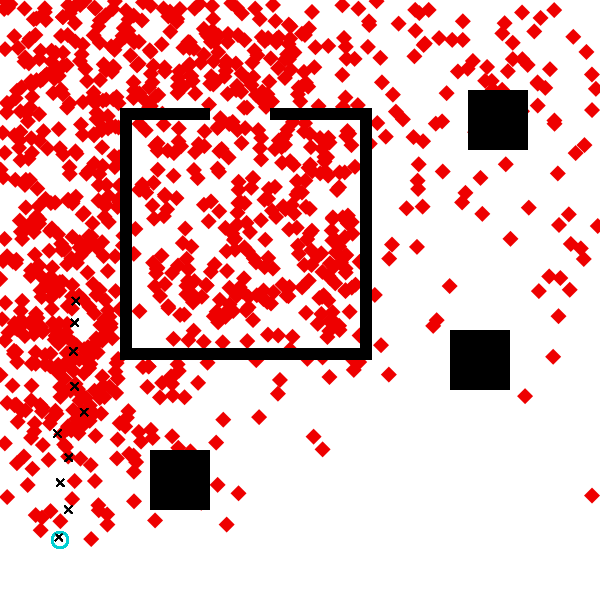

In [ ]:
visualize_inference(measurements, scene, start, computation_amt=5, samples=1000)

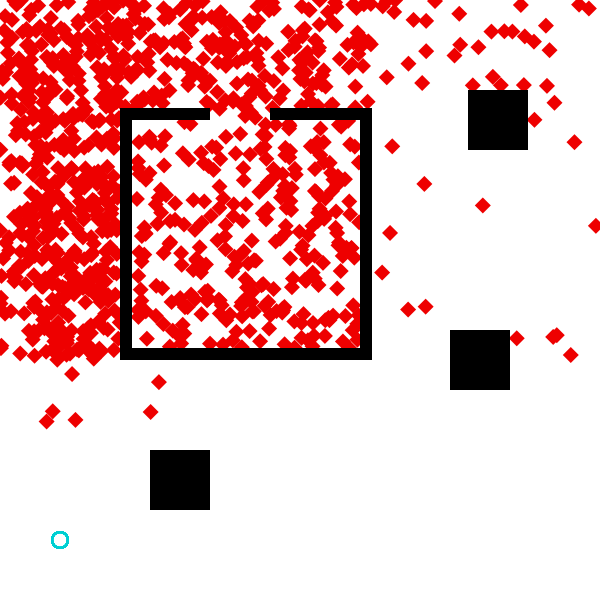

In [ ]:
visualize_data_driven_inference(measurements, scene, start, custom_dest_proposal_trainable,
    amt_computation=10, samples=1000)

We should see that the results are somewhat more accurate using the data-driven proposal. In particular, there is less probability mass in the lower left corner when using the data-driven proposal.

### Exercise 7
Can you devise a data-driven proposal for the speed of the agent? If so, would you expect it to work equally well on all data sets?

In [ ]:
@gen function agent_model(
        scene::Scene, dt::Float64, num_ticks::Int,
        planner_params::PlannerParams)

    # sample the start point of the agent from the prior
    start_x ~ uniform(0, 1)
    start_y ~ uniform(0, 1)
    start = Point(start_x, start_y)

    # sample the destination point of the agent from the prior
    dest_x ~ uniform(0, 1)
    dest_y ~ uniform(0, 1)
    dest = Point(dest_x, dest_y)

    # plan a path that avoids obstacles in the scene
    maybe_path = plan_path(start, dest, scene, planner_params)
    planning_failed = maybe_path === nothing

    # sample the speed from the prior
    speed ~ uniform(0.3, 1)

    if planning_failed
        # path planning failed; assume agent stays at start location indefinitely
        locations = fill(start, num_ticks)
    else
        # path planning succeeded; move along the path at constant speed
        locations = walk_path(maybe_path, speed, dt, num_ticks)
    end

    # generate noisy measurements of the agent's location at each time point
    noise = 0.01
    for (i, point) in enumerate(locations)
        x = {:meas => (i, :x)} ~ normal(point.x, noise)
        y = {:meas => (i, :y)} ~ normal(point.y, noise)
    end

    return (planning_failed, maybe_path)
end;